## Bayesian Statistics

### Ontology

#### concept     
$$
f(\theta|x) = \frac{f(x|\theta) \times f(\theta)}{f(x)} 
$$

1. Prior : $f(\theta)$   : 데이터를 보기 이전에, 기존에 알고 있던 분포    

2. Likelihood: $f(x|\theta)$   : 현재 관측된 데이터의 분포
  
3. Posterior : $f(\theta|x)$   : 관측된 데이터에 의해 갱신된 사전분포 => 사후분포      
                                 
                                 

### Parameter에 대한 견해 차이 

#### Frequentist : parameter 는 불확실성이 없다. 정해져있다. 

동전이 앞면일 확률이 $\theta \in [\frac{1}{4} , \frac{3}{4}]$ , 즉 둘 중 하나로서 $\theta$ 를 추정해야 한다.    
이 때 관측된 데이터는 [H,H,H,T] 이다. 이는 ~Binomial(4,$\theta$) 이므로

$f(Data = [H,H,H,T] \  \ | \ \ \theta=\frac{1}{4}) = \binom{4}{3}{\frac{1}{4}}^{3}{\frac{3}{4}}^{1}$      

$f(Data = [H,H,H,T] \  \ | \ \ \theta=\frac{3}{4}) = \binom{4}{3}{\frac{3}{4}}^{3}{\frac{1}{4}}^{1}$       

$f(Data = [H,H,H,T] \  \ | \ \ \theta=\frac{3}{4}) > f(Data = [H,H,H,T] \  \ | \ \ \theta=\frac{1}{4})$ 이므로,      
$\theta = \frac{3}{4}$ 이다  

즉, $\theta$ 는 다른 값이 될 수 없고, 될 수 있는 후보군은 오직 $\frac{3}{4}$, $\frac{1}{4}$ 둘 뿐이다.  


#### Bayesian : parameter 또한 불확실성을 갖는 random variable이다. 


동전이 앞면일 확률이 $\theta$ 는 $0 < \theta < 1$ 인 것은 알겠지만, 정확하게 몇인지는 모르겠다.      
그래서 Beta(1,1), 즉 unif(0,1) 로 가정하겠다.  


$$
f(\theta | X) = \frac{f(Data = [H,H,H,T] \ \ | \ \ \theta) \ \ \times \ \ U[0,1]}{f(X)}
$$

$$ {\frac{\theta^3 (1-\theta)^1 \ \ \times \ \ I_{[0 < \theta <1]}}{\int f(x | \theta) \ \ d \theta}}$$     


$$
\approx \theta^3 (1-\theta)^1
$$







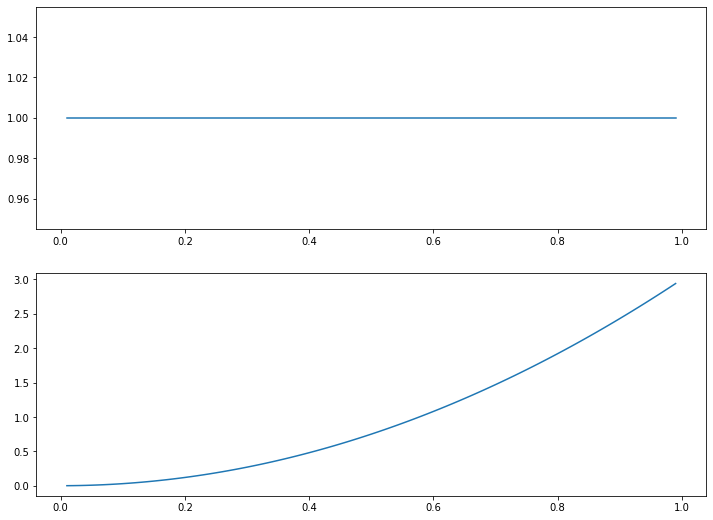

In [5]:
from scipy.stats import beta, gamma
from numpy import linspace, exp

x = linspace(0.01, 0.99, 99)
plt.figure(figsize = (12, 9))
plt.subplot(2, 1, 1)
plt.plot(x,beta(1,1).pdf(x))
plt.subplot(2, 1, 2)
plt.plot(x, beta(3,1).pdf(x))

이 때 likelihood 에서  $\tilde{y} = [y_1, y_2, y_3, ... , y_n]$ 을 의미한다.   

$$f(\tilde{y} | \theta) = f(Y_1 = y_1, Y_2 = y_2, Y_3 = y_3 ... Y_n = y_n | \theta)$$   
$$ = f(Y_1 = y_1 | \theta) \times  f(Y_2 = y_2 | \theta)    \times    f(Y_3 = y_3 | \theta)   \times ...   \times    f(Y_n = y_n | \theta)  $$    
$$ = \theta^{y_1} (1-\theta)^{1-y_1} \times \theta^{y_2} (1-\theta)^{1-y_2} \times .....   \times \theta^{y_n} (1-\theta)^{1-y_n}$$    
$$ = {\Large{\theta}}^{\sum_i y_i} {\Large(1-\theta)}^{n - \sum_i y_i}$$ 

따라서     

$$ {\Large{f(\theta|\tilde{y} )}} = \frac {{\Large{\theta}}^{\sum_i y_i} {\Large(1-\theta)}^{n - \sum_i y_i} \times \frac{\Gamma{(\alpha + \beta)}}{\Gamma{(\alpha)}\Gamma{(\beta)}} {\Large{\theta}}^{\alpha - 1} {\large{(1-\theta)}}^{\beta-1}} {\Large{f(y)}}$$      
      

$$ \approx \frac{\Gamma{(\alpha + \beta)}}{\Gamma{(\alpha)}\Gamma{(\beta)}} \  \ {\Large{\theta}}^{\sum_i y_i + \alpha - 1} {\Large{(1-\theta)}}^{n - \sum_i y_i + \beta - 1}$$     


$$\approx BetaDist(\sum_i y_i + \alpha \  \ , \  \ n - \sum_i y_i + \beta)$$     

$\theta$ 에 대한 posterior 분포는 Beta( $\sum_i y_i + \alpha$ , $n - \sum_i y_i + \beta$ ) 를 따른다.    


$$prior \  \ \theta 's \ \ mean = \frac{\alpha}{\alpha + \beta}$$    
$$posterior \  \ \theta's \  \ mean = \frac {\alpha + \sum y_i}{\alpha + \sum y_i + n - \sum_i y_i + \beta} = \frac{\alpha +  \sum y_i}{\alpha + \beta + n}$$

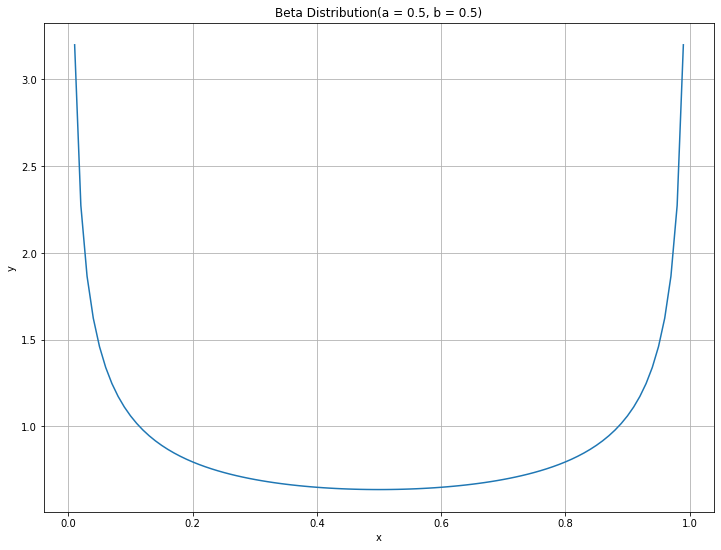

In [80]:
import matplotlib.pyplot as plt
from numpy import linspace, exp
from scipy.special import beta, gamma

x = linspace(0.01, 0.99, 99)
a = 0.5
b = 0.5
y = (1/beta(a,b)) * x **(a-1)*(1-x)**(b-1)
plt.figure(figsize = (12,9))
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Beta Distribution(a = 0.5, b = 0.5)")
plt.grid()
plt.show()




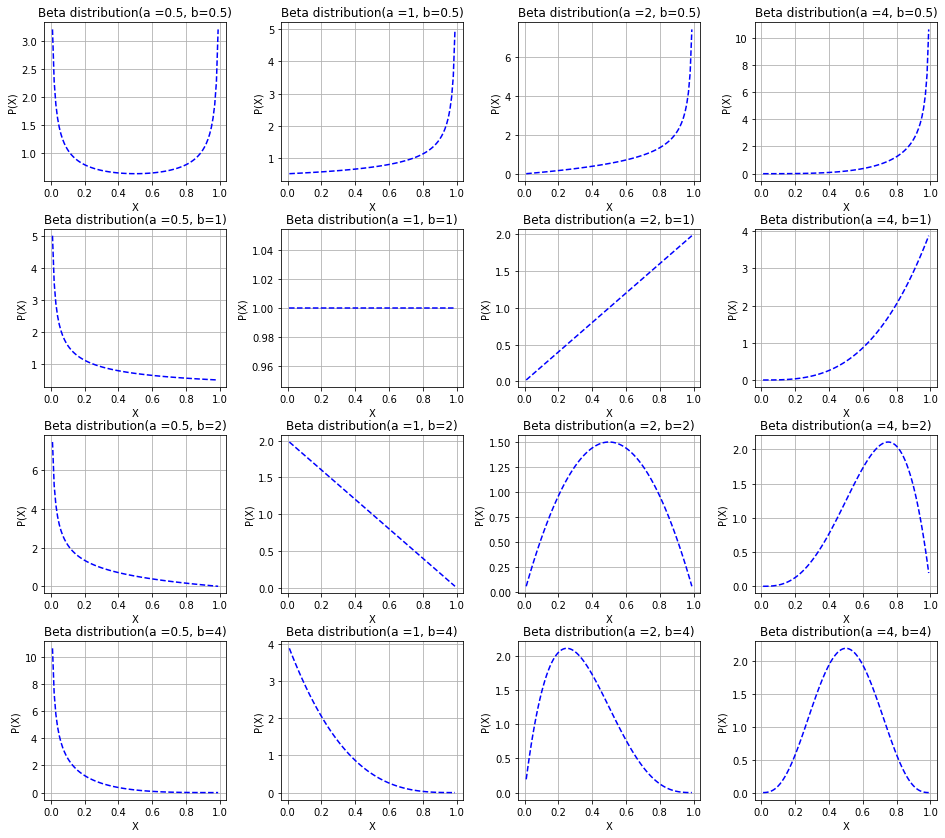

In [13]:
from scipy.stats import beta, gamma

variousBetaFig = plt.figure(figsize=(16,12))
d = [0.5, 1, 2, 4]

for idx in range(16):
    a = d[idx % 4]
    b = d[idx //4]
    
    ax = variousBetaFig.add_subplot(4, 4, 1+idx)
    ax.set_title("Beta distribution(a =" +str(a)+", b="+str(b)+")")
    ax.set_xlabel("X")
    ax.set_ylabel("P(X)")
    ax.grid()
    ax.plot(x, beta(a,b).pdf(x), 'b--')
    
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.3, wspace = 0.3) 
plt.show()

### Problem Setting 

학생 1과 학생 2가 4지선다형인 문제 40문제를 푼다.    
학생 1이 한 문제를 맞출 확률은 $\theta_{1}$, 학생 2가 한 문제를 맞출 확률은 $\theta_{2}$ 이다.    

random 보다는 문제를 더 잘맞추는 것으로 알려져있다.    
(prior) 학생1은 5문제 중 3문제 정도를 맞추는 수준이다. 

$$f(\theta|x) = \frac{f(x|\theta) \times f(\theta)}{f(x)} $$     
$$ = \frac{Binomial(33, \theta_1) \times Beta(3,2)}{f(x)}$$    
$$ = \frac{\binom{40}{33}\theta_1^{33}(1-\theta_1)^7 \times \frac{\Gamma{(6)}}{\Gamma{(4)}\Gamma{(2)}} \theta_1^{3-1} (1-\theta_1)^{2-1}}{f(x)}$$     
$$ = \frac{\binom{40}{33} \frac{\Gamma{(6)}}{\Gamma{(4)}\Gamma{(2)}} \theta_1^{36} (1-\theta_1)^{8} }{f(x)}$$      

$$ \approx Beta(36,8)$$

1. 첫번째 학생의 prior 분포와 33문제를 맞히고 난 뒤의 posterior의 분포    =>   
  그리고 나서 24문제 더 맞추고, 7문제를 틀린 후의 posterior 의 분포 

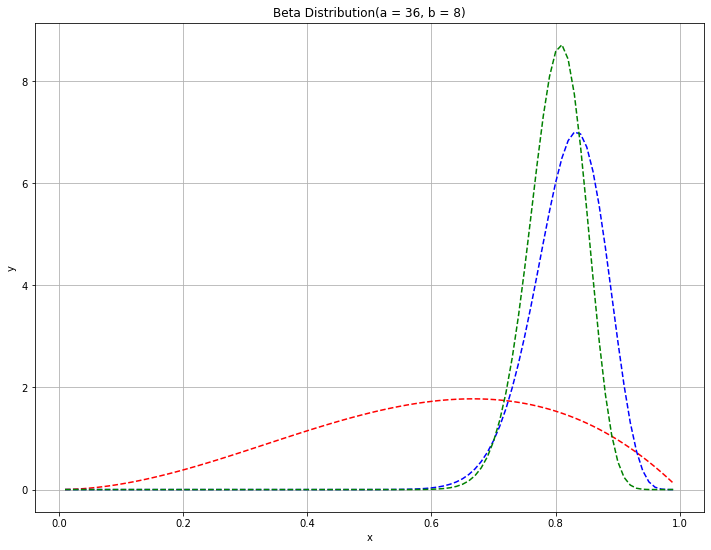

In [79]:
from scipy.stats import beta, gamma
plt.figure(figsize = (12,9))

posterior =  beta(36,8).pdf(x)
newest = beta(60,15).pdf(x)
prior = beta(3,2).pdf(x)

plt.plot(x, prior, 'r--')
plt.plot(x, posterior, 'b--')
plt.plot(x, newest, 'g--')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Beta Distribution(a = 36, b = 8)")
plt.grid()
plt.show()




In [76]:
beta(3,2).pdf(x)

TypeError: 'numpy.int64' object is not callable

In [26]:
## confidence Interval 
print(beta.ppf(0.025, 36, 8),beta.ppf(0.975, 36, 8))
print(beta.ppf(0.025, 3, 2),beta.ppf(0.975, 3, 2))


0.69298912763509 0.9160876002244056
0.19412044968324338 0.932414013511457


## Online learning 에 적합한 사례

#### 시간이 지나면서, 분포에 대한 성격이 변할때      
frequentist 는 재학습을 한 후에야 모델의 parameter가 변한다.     
하지만, bayesian은 수시로 update되면서 변한다. 따라서 그때 그때 맞는 분포를 제시할 수 있다. 

In [70]:

alpha, beta = 1,1
freq_parameter = 0.2

bayes_acc = []
freq_acc = []

thetaList = [[0.1,0.2]*10, [0.3,0.4]*10, [0.6,0.7]*20, [0.8,0.9]*50]
for theta in [elem for array in thetaList for elem in array]:
    actual_data = np.random.binomial(1, theta, 100)
    parameter = np.random.beta(alpha, beta,1)[0]
    
    predict_bayes_data = np.random.binomial(1, parameter, 100)
    predict_freq_data = np.random.binomial(1, freq_parameter,100)
    
    bayes_accuracy = len(np.where(actual_data == predict_bayes_data)[0]) /100
    freq_accuracy = len(np.where(actual_data ==predict_freq_data)[0]) /100
    alpha += np.sum(actual_data)
    beta += 100 - np.sum(actual_data)
    
    bayes_acc.append(bayes_accuracy)
    freq_acc.append(freq_accuracy)



Text(0, 0.5, 'accuracy')

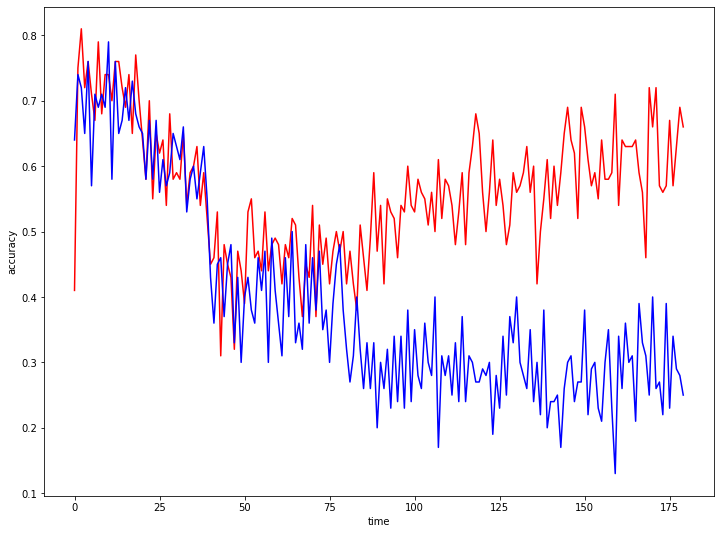

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,9))
plt.plot( bayes_acc, 'r-')
plt.plot( freq_acc, 'b-')
plt.xlabel("time")
plt.ylabel("accuracy")